In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
def rho_frw(t):
    return 25
def rho(r,t):
    r_h=0.042
    A=50.59
    r_M=0.037
    sig=r_h/10
    eps=0.0025

    if r> r_h:
        return rho_frw(t)
    else:
        return A*np.exp(-1*(r-r_M)**2/(2*sig**2))+eps
def intg(r,t):
    return rho(r,t)*r**2

def H_frw(t):
    return np.sqrt((4/9)*rho_frw(t))
def rho_bar(r,t):
    temp=quad(intg, 0, r,args=t)[0]
    temp=temp*3/r**3
    return temp

def M(r):
    t=1
    temp=rho_bar(r,t)*r**3*4/3*np.pi
    return temp
def dM(r):
    dr=0.01
    return (M(r+dr/2)-M(r-dr/2))/dr

def E(r):
    t=1
    temp=1/2*H_frw(t)**2*r**2-1/(6*np.pi)*M(r)/r
    return temp

def dYdr(Y,r):
    dr=r[2]-r[0]
    Y=np.insert(Y, 0, Y[0], axis=0)
    Y=np.append(Y,Y[len(Y)-1])
    temp=[]
    for i in range(len(r)):
        t=(Y[i+2]-Y[i])/dr
        temp.append(t)
    return temp


In [2]:
def t_hat(r,t_bar):
    return t_bar-rho_bar(r,t_bar)**(-1/2)
def Y(r,t):
    t_bar=-0.8
    temp=(3*M(r)/(4*np.pi))**(1/3)*(t-t_hat(r,t_bar))**(2/3)
    return temp

C:\Users\87588\AppData\Local\Temp\ipykernel_57052\4021913093.py:24: RuntimeWarning: invalid value encountered in scalar divide
  temp=temp*3/r**3


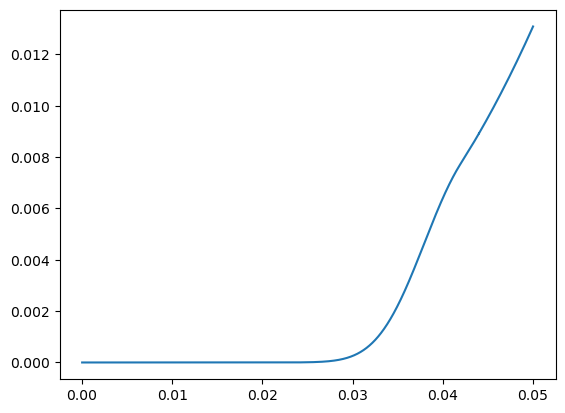

In [5]:
r=np.linspace(0, 0.05,10000)
t=1
I=[]
for i in range(0,len(r)):
    I.append(rho_bar(r[i],t))
I=np.array(I)
rplot=[]
MArray=[]
for i in range(0,len(r)):
    rplot.append(rho(r[i], t))

for i in range(0,len(r)):
    MArray.append(M(r[i]))

plt.figure()
plt.plot(r,MArray)